# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Converting to Datetime
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')

# Converting the Temperatures to Degrees Celcius by dividing by 10
df.loc[:,'Data_Value'] *= 0.1

# Save 2015df
df2015 = df.loc[df['Date'].dt.year == 2015]
df2015['Month'] = df2015['Date'].dt.month
df2015['Day'] = df2015['Date'].dt.day

#Looking at values after 2005 till 2014
df = df.loc[df['Date'].dt.year <= 2014]
df = df.loc[df['Date'].dt.year >= 2005]

#Dropping Leap Days
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]
df.reset_index()

#Dividing up the data by the month and day
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
print(df.head())

# Record High between and Low for each year 
# The maximum temperates for each date
maxdf = df.loc[df['Element'] == 'TMAX']
maxdf = maxdf.groupby(['Month','Day'])['Data_Value'].max()
print(maxdf.head())

# The minimum temps for each date
mindf = df.loc[df['Element'] == 'TMIN']
mindf = mindf.groupby(['Month','Day'])['Data_Value'].min()
print(mindf.head())

# Getting all the days in a year 
df15 = df2015['Date'].copy()
df15.sort(inplace=True)
dates = df15.unique()
print(dates)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            ID       Date Element  Data_Value  Month  Day
0  USW00094889 2014-11-12    TMAX         2.2     11   12
1  USC00208972 2009-04-29    TMIN         5.6      4   29
2  USC00200032 2008-05-26    TMAX        27.8      5   26
3  USC00205563 2005-11-11    TMAX        13.9     11   11
4  USC00200230 2014-02-27    TMAX       -10.6      2   27
Month  Day
1      1      15.6
       2      13.9
       3      13.3
       4      10.6
       5      12.8
Name: Data_Value, dtype: float64
Month  Day
1      1     -16.0
       2     -26.7
       3     -26.7
       4     -26.1
       5     -15.0
Name: Data_Value, dtype: float64
['2015-01-01T00:00:00.000000000' '2015-01-02T00:00:00.000000000'
 '2015-01-03T00:00:00.000000000' '2015-01-04T00:00:00.000000000'
 '2015-01-05T00:00:00.000000000' '2015-01-06T00:00:00.000000000'
 '2015-01-07T00:00:00.000000000' '2015-01-08T00:00:00.000000000'
 '2015-01-09T00:00:00.000000000' '2015-01-10T00:00:00.000000000'
 '2015-01-11T00:00:00.000000000' '2015-01-12T00:0

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:45: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [3]:
# Year 2015 Data that broke the records of the high and lows of 2005 to 2014 
df2015max = df2015.loc[df2015['Element'] == 'TMAX']
max2015df = df2015max.groupby(['Month','Day']).max()[['Data_Value','Date']]

df2015min = df2015.loc[df2015['Element'] == 'TMIN']
min2015df = df2015min.groupby(['Month','Day']).min()[['Data_Value','Date']]

finalmin2015 = []
finalmin2015_index = []
finalmax2015 = []
finalmax2015_index = []

for i, row in min2015df.iterrows():
    if row['Data_Value'] < mindf.loc[i]:
        finalmin2015_index.append(row['Date'])
        finalmin2015.append(row['Data_Value'])
        

for i, row in max2015df.iterrows():
    if row['Data_Value'] > maxdf.loc[i]:
        finalmax2015_index.append(row['Date'])
        finalmax2015.append(row['Data_Value'])


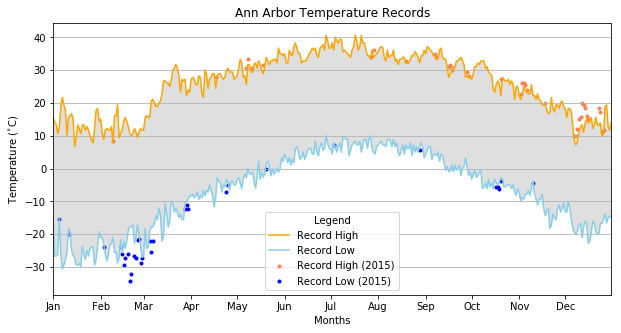

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.dates as matdate
import matplotlib.ticker as ticker

fig, ax = plt.subplots(nrows = 1,ncols=1,figsize=(10,5))
plt.plot(dates, maxdf, c='#ffa500', label = 'Record High')
plt.plot(dates, mindf, c='#87ceeb', label = 'Record Low')
plt.scatter(finalmax2015_index, finalmax2015, label = 'Record High (2015)' , c='#ff7f50', marker = '.')
plt.scatter(finalmin2015_index, finalmin2015, label = 'Record Low (2015)' , c='#0000ff', marker = '.')
plt.fill_between(dates,maxdf, mindf,facecolor='gray',alpha=0.25)
plt.legend(frameon=True, title='Legend')

# Setting the Title of the Graph, Y and X axis
ax.set_title('Ann Arbor Temperature Records')
plt.xlabel('Months')
plt.ylabel('Temperature $(^{\circ}$C)')
ax.yaxis.grid()

# Setting the axis 
# Relabeling the x axis to show the months
ax.xaxis.set_major_locator(matdate.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(matdate.DateFormatter('%b'))

# Setting the axis to show from Jan till Decem
ax.set_xlim(dates[0],dates[-1])

plt.show()